In [1]:
import pandas as pd
import datetime as dt

In [2]:
file_loc = '/Users/yimi/Desktop/Uchi/Winter2022/Linear-NonLinear/A1/WeightDiary.xlsx'
df = pd.read_excel(file_loc)

In [3]:
df.head()

,Date,Weight
0,2017-03-04,209.7
1,2017-03-04,212.4
2,2017-03-05,210.0
3,2017-03-05,214.3
4,2017-03-06,209.1


In [4]:
#Get name of month and name of DayOfWeek
df['Month'] = df['Date'].dt.strftime("%B")
df['DayOfWeek'] = df['Date'].dt.strftime('%A')

In [5]:
df

,Date,Weight,Month,DayOfWeek
0,2017-03-04,209.7,March,Saturday
1,2017-03-04,212.4,March,Saturday
2,2017-03-05,210.0,March,Sunday
3,2017-03-05,214.3,March,Sunday
4,2017-03-06,209.1,March,Monday
...,...,...,...,...
1039,2019-12-27,217.8,December,Friday
1040,2019-12-28,215.6,December,Saturday
1041,2019-12-29,214.5,December,Sunday
1042,2019-12-30,214.7,December,Monday


In [6]:
m_order = ['January', 'February', 'March', 'April', 'May', 'June', 
           'July', 'August', 'September', 'October', 'November', 'December']
mfreq = df.groupby(['Month']).Date.count().reindex(m_order, axis=0)
print(mfreq)

Month
January       60
February      56
March        115
April        112
May          105
June          98
July          82
August        72
September     85
October       86
November      83
December      90
Name: Date, dtype: int64


<AxesSubplot:xlabel='Month'>

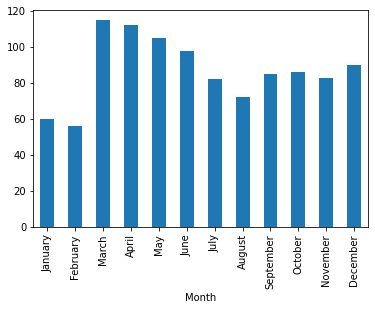

In [7]:
mfreq.plot(kind="bar")

In [8]:
w_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
wfreq = df.groupby(['DayOfWeek']).Date.count().reindex(w_order, axis=0)
print(wfreq)

DayOfWeek
Monday       148
Tuesday      153
Wednesday    151
Thursday     154
Friday       145
Saturday     146
Sunday       147
Name: Date, dtype: int64


<AxesSubplot:xlabel='DayOfWeek'>

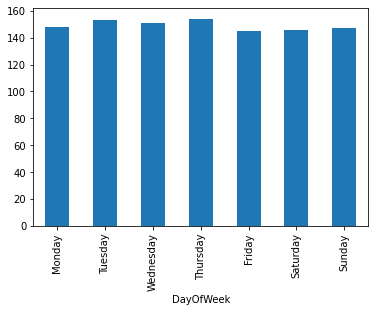

In [9]:
wfreq.plot(kind="bar")

In [12]:
df.columns

Index(['Date', 'Weight', 'Month', 'DayOfWeek'], dtype='object')

In [13]:
#Set answers into .7E scientific notation
pd.options.display.float_format = '{:.7e}'.format

In [14]:
X = df[['Weight']] 
X.insert(0, 'Intercept', 1)

y = df['Weight']
Xt = X.transpose()
XtX = Xt.dot(X)
Xty = Xt.dot(y)

In [15]:
XtX

,Intercept,Weight
Intercept,1.0440000e+03,2.1617960e+05
Weight,2.1617960e+05,4.4786364e+07


In [16]:
X = pd.get_dummies(df[['Month','DayOfWeek']])
X = X.join(df[['Weight']])
X.insert(0, 'Intercept', 1)
Xt = X.transpose()
XtX = Xt.dot(X)

In [18]:
X.columns

Index(['Intercept', 'Month_April', 'Month_August', 'Month_December',
       'Month_February', 'Month_January', 'Month_July', 'Month_June',
       'Month_March', 'Month_May', 'Month_November', 'Month_October',
       'Month_September', 'DayOfWeek_Friday', 'DayOfWeek_Monday',
       'DayOfWeek_Saturday', 'DayOfWeek_Sunday', 'DayOfWeek_Thursday',
       'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday', 'Weight'],
      dtype='object')

In [17]:
X

,Intercept,Month_April,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,...,Month_October,Month_September,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,Weight
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,2.0970000e+02
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,2.1240000e+02
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,2.1000000e+02
3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,2.1430000e+02
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,2.0910000e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2.1780000e+02
1040,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2.1560000e+02
1041,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2.1450000e+02
1042,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2.1470000e+02


In [73]:
XtX

,Intercept,Month_April,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,...,Month_October,Month_September,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,Weight
Intercept,1044.0,112.0,72.0,90.0,56.0,60.0,82.0,98.0,115.0,105.0,...,86.0,85.0,145.0,148.0,146.0,147.0,154.0,153.0,151.0,216179.60
Month_April,112.0,112.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,14.0,17.0,17.0,16.0,16.0,16.0,16.0,23187.10
Month_August,72.0,0.0,72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,12.0,8.0,10.0,10.0,12.0,9.0,11.0,14863.10
Month_December,90.0,0.0,0.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,13.0,14.0,13.0,14.0,12.0,13.0,11.0,19018.10
Month_February,56.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,11562.20
Month_January,60.0,0.0,0.0,0.0,0.0,60.0,0.0,0.0,0.0,0.0,...,0.0,0.0,7.0,9.0,8.0,8.0,9.0,10.0,9.0,12413.40
Month_July,82.0,0.0,0.0,0.0,0.0,0.0,82.0,0.0,0.0,0.0,...,0.0,0.0,10.0,13.0,10.0,12.0,12.0,13.0,12.0,16744.00
Month_June,98.0,0.0,0.0,0.0,0.0,0.0,0.0,98.0,0.0,0.0,...,0.0,0.0,16.0,13.0,15.0,13.0,14.0,13.0,14.0,20003.60
Month_March,115.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,115.0,0.0,...,0.0,0.0,17.0,15.0,18.0,17.0,16.0,16.0,16.0,23973.00
Month_May,105.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105.0,...,0.0,0.0,13.0,15.0,13.0,14.0,16.0,17.0,17.0,21508.90


In [27]:
import numpy as np
def sweep(g, k):
    g = np.asarray(g)
    n = g.shape[0]
    if g.shape != (n, n):
        raise ValueError('Not a square array')
    if not np.allclose(g - g.T, 0):
        raise ValueError('Not a symmetrical array')
    if k >= n:
        raise ValueError('Not a valid row number')
    #  Fill with the general formula
    h = g - np.outer(g[:, k], g[k, :]) / g[k, k]
    # h = g - g[:, k:k+1] * g[k, :] / g[k, k]
    # Modify the k-th row and column
    h[:, k] = g[:, k] / g[k, k]
    h[k, :] = h[:, k]
    # Modify the pivot
    h[k, k] = -1 / g[k, k]
    return h

In [28]:
def SWEEPOperator (pDim, inputM, origDiag, sweepCol = None, tol = 1e-7):
    # pDim: dimension of matrix inputM, integer greater than one
    # inputM: a square and symmetric matrix, numpy array
    # origDiag: the original diagonal elements before any SWEEPing
    # sweepCol: a list of columns numbers to SWEEP
    # tol: singularity tolerance, positive real

    if (sweepCol is None):
        sweepCol = range(pDim)

    aliasParam = []
    nonAliasParam = []

    A = np.copy(inputM)

    for k in sweepCol:
        Akk = A[k,k]
        pivot = abs(Akk)
        if (pivot >= abs(tol * origDiag[k])):
            nonAliasParam.append(k)
            ANext = A - np.outer(A[:, k], A[k, :]) / Akk
            ANext[:, k] = A[:, k] / pivot
            ANext[k, :] = ANext[:, k]
            ANext[k, k] = -1.0 / Akk
        else:
            aliasParam.append(k)
            ANext[:,k] = np.zeros(pDim)
            ANext[k, :] = np.zeros(pDim)
        A = ANext
    return (A, aliasParam, nonAliasParam)

In [36]:
SWEEPOperator(XtX.shape[0],XtX,np.diag(XtX),[0,1])

(array([[-1.07296137e-03,  1.07296137e-03,  7.72532189e-02,
          9.65665236e-02,  6.00858369e-02,  6.43776824e-02,
          8.79828326e-02,  1.05150215e-01,  1.23390558e-01,
          1.12660944e-01,  8.90557940e-02,  9.22746781e-02,
          9.12017167e-02,  1.40557940e-01,  1.40557940e-01,
          1.38412017e-01,  1.40557940e-01,  1.48068670e-01,
          1.46995708e-01,  1.44849785e-01,  2.07073498e+02],
        [ 1.07296137e-03, -1.00015328e-02, -7.72532189e-02,
         -9.65665236e-02, -6.00858369e-02, -6.43776824e-02,
         -8.79828326e-02, -1.05150215e-01, -1.23390558e-01,
         -1.12660944e-01, -8.90557940e-02, -9.22746781e-02,
         -9.12017167e-02, -1.55579399e-02,  1.12277744e-02,
          1.33736971e-02,  2.29920294e-03, -5.21152667e-03,
         -4.13856530e-03, -1.99264255e-03, -4.58192826e-02],
        [ 7.72532189e-02, -7.72532189e-02,  6.64377682e+01,
         -6.95278970e+00, -4.32618026e+00, -4.63519313e+00,
         -6.33476395e+00, -7.57081545e

In [34]:
#1
a = sweep(XtX,0)
dfa = pd.DataFrame(a)
dfa

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-9.5785441e-04,1.0727969e-01,6.8965517e-02,8.6206897e-02,5.3639847e-02,5.7471264e-02,7.8544061e-02,9.3869732e-02,1.1015326e-01,1.0057471e-01,...,8.2375479e-02,8.1417625e-02,1.3888889e-01,1.4176245e-01,1.3984674e-01,1.4080460e-01,1.4750958e-01,1.4655172e-01,1.4463602e-01,2.0706858e+02
1,1.0727969e-01,9.9984674e+01,-7.7241379e+00,-9.6551724e+00,-6.0076628e+00,-6.4367816e+00,-8.7969349e+00,-1.0513410e+01,-1.2337165e+01,-1.1264368e+01,...,-9.2260536e+00,-9.1187739e+00,-1.5555556e+00,1.1226054e+00,1.3371648e+00,2.2988506e-01,-5.2107280e-01,-4.1379310e-01,-1.9923372e-01,-4.5812261e+00
2,6.8965517e-02,-7.7241379e+00,6.7034483e+01,-6.2068966e+00,-3.8620690e+00,-4.1379310e+00,-5.6551724e+00,-6.7586207e+00,-7.9310345e+00,-7.2413793e+00,...,-5.9310345e+00,-5.8620690e+00,2.0000000e+00,-2.2068966e+00,-6.8965517e-02,-1.3793103e-01,1.3793103e+00,-1.5517241e+00,5.8620690e-01,-4.5837931e+01
3,8.6206897e-02,-9.6551724e+00,-6.2068966e+00,8.2241379e+01,-4.8275862e+00,-5.1724138e+00,-7.0689655e+00,-8.4482759e+00,-9.9137931e+00,-9.0517241e+00,...,-7.4137931e+00,-7.3275862e+00,5.0000000e-01,1.2413793e+00,4.1379310e-01,1.3275862e+00,-1.2758621e+00,-1.8965517e-01,-2.0172414e+00,3.8192759e+02
4,5.3639847e-02,-6.0076628e+00,-3.8620690e+00,-4.8275862e+00,5.2996169e+01,-3.2183908e+00,-4.3984674e+00,-5.2567050e+00,-6.1685824e+00,-5.6321839e+00,...,-4.6130268e+00,-4.5593870e+00,2.2222222e-01,6.1302682e-02,1.6858238e-01,1.1494253e-01,-2.6053640e-01,-2.0689655e-01,-9.9616858e-02,-3.3640613e+01
5,5.7471264e-02,-6.4367816e+00,-4.1379310e+00,-5.1724138e+00,-3.2183908e+00,5.6551724e+01,-4.7126437e+00,-5.6321839e+00,-6.6091954e+00,-6.0344828e+00,...,-4.9425287e+00,-4.8850575e+00,-1.3333333e+00,4.9425287e-01,-3.9080460e-01,-4.4827586e-01,1.4942529e-01,1.2068966e+00,3.2183908e-01,-1.0714943e+01
6,7.8544061e-02,-8.7969349e+00,-5.6551724e+00,-7.0689655e+00,-4.3984674e+00,-4.7126437e+00,7.5559387e+01,-7.6973180e+00,-9.0325670e+00,-8.2471264e+00,...,-6.7547893e+00,-6.6762452e+00,-1.3888889e+00,1.3754789e+00,-1.4674330e+00,4.5402299e-01,-9.5785441e-02,9.8275862e-01,1.3984674e-01,-2.3562375e+02
7,9.3869732e-02,-1.0513410e+01,-6.7586207e+00,-8.4482759e+00,-5.2567050e+00,-5.6321839e+00,-7.6973180e+00,8.8800766e+01,-1.0795019e+01,-9.8563218e+00,...,-8.0727969e+00,-7.9789272e+00,2.3888889e+00,-8.9272031e-01,1.2950192e+00,-7.9885057e-01,-4.5593870e-01,-1.3620690e+00,-1.7432950e-01,-2.8912107e+02
8,1.1015326e-01,-1.2337165e+01,-7.9310345e+00,-9.9137931e+00,-6.1685824e+00,-6.6091954e+00,-9.0325670e+00,-1.0795019e+01,1.0233238e+02,-1.1566092e+01,...,-9.4731801e+00,-9.3630268e+00,1.0277778e+00,-1.3026820e+00,1.9176245e+00,8.0747126e-01,-9.6360153e-01,-8.5344828e-01,-6.3314176e-01,1.6011303e+02
9,1.0057471e-01,-1.1264368e+01,-7.2413793e+00,-9.0517241e+00,-5.6321839e+00,-6.0344828e+00,-8.2471264e+00,-9.8563218e+00,-1.1566092e+01,9.4439655e+01,...,-8.6494253e+00,-8.5488506e+00,-1.5833333e+00,1.1494253e-01,-1.6839080e+00,-7.8448276e-01,5.1149425e-01,1.6120690e+00,1.8132184e+00,-2.3330115e+02


In [35]:
b = sweep(dfa,1)
dfb = pd.DataFrame(b)
dfb

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-1.0729614e-03,1.0729614e-03,7.7253219e-02,9.6566524e-02,6.0085837e-02,6.4377682e-02,8.7982833e-02,1.0515021e-01,1.2339056e-01,1.1266094e-01,...,9.2274678e-02,9.1201717e-02,1.4055794e-01,1.4055794e-01,1.3841202e-01,1.4055794e-01,1.4806867e-01,1.4699571e-01,1.4484979e-01,2.0707350e+02
1,1.0729614e-03,-1.0001533e-02,-7.7253219e-02,-9.6566524e-02,-6.0085837e-02,-6.4377682e-02,-8.7982833e-02,-1.0515021e-01,-1.2339056e-01,-1.1266094e-01,...,-9.2274678e-02,-9.1201717e-02,-1.5557940e-02,1.1227774e-02,1.3373697e-02,2.2992029e-03,-5.2115267e-03,-4.1385653e-03,-1.9926426e-03,-4.5819283e-02
2,7.7253219e-02,-7.7253219e-02,6.6437768e+01,-6.9527897e+00,-4.3261803e+00,-4.6351931e+00,-6.3347639e+00,-7.5708155e+00,-8.8841202e+00,-8.1115880e+00,...,-6.6437768e+00,-6.5665236e+00,1.8798283e+00,-2.1201717e+00,3.4334764e-02,-1.2017167e-01,1.3390558e+00,-1.5836910e+00,5.7081545e-01,-4.6191845e+01
3,9.6566524e-02,-9.6566524e-02,-6.9527897e+00,8.1309013e+01,-5.4077253e+00,-5.7939914e+00,-7.9184549e+00,-9.4635193e+00,-1.1105150e+01,-1.0139485e+01,...,-8.3047210e+00,-8.2081545e+00,3.4978541e-01,1.3497854e+00,5.4291845e-01,1.3497854e+00,-1.3261803e+00,-2.2961373e-01,-2.0364807e+00,3.8148519e+02
4,6.0085837e-02,-6.0085837e-02,-4.3261803e+00,-5.4077253e+00,5.2635193e+01,-3.6051502e+00,-4.9270386e+00,-5.8884120e+00,-6.9098712e+00,-6.3090129e+00,...,-5.1673820e+00,-5.1072961e+00,1.2875536e-01,1.2875536e-01,2.4892704e-01,1.2875536e-01,-2.9184549e-01,-2.3175966e-01,-1.1158798e-01,-3.3915880e+01
5,6.4377682e-02,-6.4377682e-02,-4.6351931e+00,-5.7939914e+00,-3.6051502e+00,5.6137339e+01,-5.2789700e+00,-6.3090129e+00,-7.4034335e+00,-6.7596567e+00,...,-5.5364807e+00,-5.4721030e+00,-1.4334764e+00,5.6652361e-01,-3.0472103e-01,-4.3347639e-01,1.1587983e-01,1.1802575e+00,3.0901288e-01,-1.1009871e+01
6,8.7982833e-02,-8.7982833e-02,-6.3347639e+00,-7.9184549e+00,-4.9270386e+00,-5.2789700e+00,7.4785408e+01,-8.6223176e+00,-1.0118026e+01,-9.2381974e+00,...,-7.5665236e+00,-7.4785408e+00,-1.5257511e+00,1.4742489e+00,-1.3497854e+00,4.7424893e-01,-1.4163090e-01,9.4635193e-01,1.2231760e-01,-2.3602682e+02
7,1.0515021e-01,-1.0515021e-01,-7.5708155e+00,-9.4635193e+00,-5.8884120e+00,-6.3090129e+00,-8.6223176e+00,8.7695279e+01,-1.2092275e+01,-1.1040773e+01,...,-9.0429185e+00,-8.9377682e+00,2.2253219e+00,-7.7467811e-01,1.4356223e+00,-7.7467811e-01,-5.1072961e-01,-1.4055794e+00,-1.9527897e-01,-2.8960279e+02
8,1.2339056e-01,-1.2339056e-01,-8.8841202e+00,-1.1105150e+01,-6.9098712e+00,-7.4034335e+00,-1.0118026e+01,-1.2092275e+01,1.0081009e+02,-1.2956009e+01,...,-1.0611588e+01,-1.0488197e+01,8.3583691e-01,-1.1641631e+00,2.0826180e+00,8.3583691e-01,-1.0278970e+00,-9.0450644e-01,-6.5772532e-01,1.5954775e+02
9,1.1266094e-01,-1.1266094e-01,-8.1115880e+00,-1.0139485e+01,-6.3090129e+00,-6.7596567e+00,-9.2381974e+00,-1.1040773e+01,-1.2956009e+01,9.3170601e+01,...,-9.6888412e+00,-9.5761803e+00,-1.7585837e+00,2.4141631e-01,-1.5332618e+00,-7.5858369e-01,4.5278970e-01,1.5654506e+00,1.7907725e+00,-2.3381727e+02


In [38]:
#Q1-c Weight ~ Intercept + Month
A, aliasParam, nonAliasParam = SWEEPOperator(XtX.shape[0],XtX,np.diag(XtX),range(13))
A

array([[-1.17647059e-02,  1.17647059e-02,  1.17647059e-02,
         1.17647059e-02,  1.17647059e-02,  1.17647059e-02,
         1.17647059e-02,  1.17647059e-02,  1.17647059e-02,
         1.17647059e-02,  1.17647059e-02,  1.17647059e-02,
         0.00000000e+00,  1.52941176e-01,  1.41176471e-01,
         1.52941176e-01,  1.64705882e-01,  1.41176471e-01,
         1.29411765e-01,  1.17647059e-01,  2.07269412e+02],
       [ 1.17647059e-02, -2.06932773e-02, -1.17647059e-02,
        -1.17647059e-02, -1.17647059e-02, -1.17647059e-02,
        -1.17647059e-02, -1.17647059e-02, -1.17647059e-02,
        -1.17647059e-02, -1.17647059e-02, -1.17647059e-02,
         0.00000000e+00, -2.79411765e-02,  1.06092437e-02,
        -1.15546218e-03, -2.18487395e-02,  1.68067227e-03,
         1.34453782e-02,  2.52100840e-02, -2.41733193e-01],
       [ 1.17647059e-02, -1.17647059e-02, -2.56535948e-02,
        -1.17647059e-02, -1.17647059e-02, -1.17647059e-02,
        -1.17647059e-02, -1.17647059e-02, -1.17647059e

KeyError: 19